## Import

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm , datasets
from sklearn.metrics import confusion_matrix , accuracy_score , f1_score , precision_score , recall_score ,\
classification_report , ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the Data

In [5]:
data = pd.read_csv(r"C:\Users\bssam\Downloads\mushrooms-full-dataset.csv")
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Check if the data is Balanced or Not

In [6]:
data['poisonous'].value_counts()

poisonous
e    4208
p    3916
Name: count, dtype: int64

In [7]:
data.isnull().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Define Inputs and Targets

In [8]:
target = data['poisonous']
inputs = data.drop(['poisonous'],axis=1)

## Split our Data

In [9]:
x_train , x_test , y_train , y_test = train_test_split(inputs , target , random_state=365 , test_size=0.2 , stratify= target )

In [10]:
y_train.value_counts()

poisonous
e    3366
p    3133
Name: count, dtype: int64

## Encoding Inputs and Target

In [11]:
enc_i = OrdinalEncoder()
enc_t = LabelEncoder()

In [12]:
x_train_transform = enc_i.fit_transform(x_train)
x_test_transform = enc_i.transform(x_test)

y_train_transform = enc_t.fit_transform(y_train)
y_test_transform = enc_t.transform(y_test)

In [13]:
y_train_transform

array([0, 0, 0, ..., 1, 0, 0])

## Rescaling

In [14]:
scaling = MinMaxScaler(feature_range=(-1 , 1)).fit(x_train_transform)
x_train_rescaled = scaling.transform(x_train_transform)

## Classification

### Set Parameters

In [15]:
c = 1.0
kernel = 'linear'

### Perform SVM Model

In [16]:
svc = svm.SVC(kernel = kernel , C= c).fit(x_train_rescaled , y_train_transform)

In [17]:
y_predict = svc.predict(scaling.transform(x_test_transform))

In [18]:
y_predict

array([1, 1, 1, ..., 1, 1, 0])

## Model Evaluation

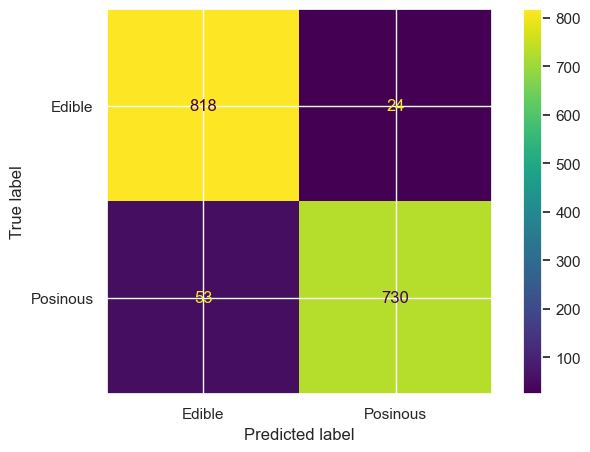

In [19]:
fig , ax = plt.subplots(figsize = (8,5))

cmp = ConfusionMatrixDisplay(confusion_matrix(y_test_transform , y_predict),display_labels=['Edible' , 'Posinous'])

cmp.plot(ax=ax);

In [20]:
print(classification_report(y_test_transform, y_predict , target_names=['Edible' , 'Poisnous']))

              precision    recall  f1-score   support

      Edible       0.94      0.97      0.96       842
    Poisnous       0.97      0.93      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



## GridSearch

In [21]:
parameters = [{'kernel':['linear'],'C':[1,10]},
             {'kernel':['poly'],'C':[1,10]},
                {'kernel':['rbf'], 'gamma':[1e-1,1e-4] ,'C':[1,10]}]

In [22]:
scores = ["precision", "recall"]

In [23]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), parameters, scoring='%s_macro' % score)
    clf.fit(x_train_rescaled, y_train_transform)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test_transform, clf.predict(scaling.transform(x_test_transform))
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'kernel': 'poly'}

Grid scores on development set:

0.952 (+/-0.013) for {'C': 1, 'kernel': 'linear'}
0.954 (+/-0.009) for {'C': 10, 'kernel': 'linear'}
1.000 (+/-0.000) for {'C': 1, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 10, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.894 (+/-0.014) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.927 (+/-0.004) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00   

In [24]:
svc_gridsearch = svm.SVC(kernel = 'poly' , C= 1).fit(x_train_rescaled , y_train_transform)
y_predict_gridsearch = svc_gridsearch.predict(scaling.transform(x_test_transform))

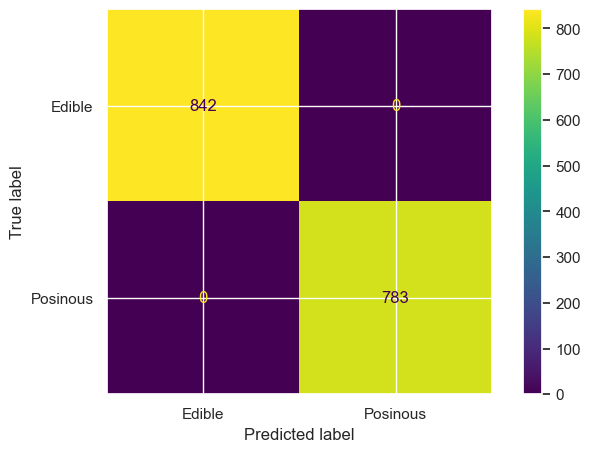

In [25]:
fig , ax = plt.subplots(figsize = (8,5))

cmp1 = ConfusionMatrixDisplay(confusion_matrix(y_test_transform , y_predict_gridsearch),display_labels=['Edible' , 'Posinous'])

cmp1.plot(ax=ax);